### 2023-06-02_02_Data_Preprocessing_credit-score-analysis

## Project description
Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status an 
number of children has an impact on whether they will default on a loan. The bank already has some data  n
customers’ credit worthine    ss.
Your report will be considered when building a credit scoring of a potential customer. A credit scoring is used to
evaluate the ability of a potential borrower to repay their 

----

## Описание проекта
Ваш проект заключается в подготовке отчета для кредитного отдела банка. Вам нужно будет выяснить, влияет ли  семейное положение клиента и количество детей на то, допустит ли он дефолт по кредиту. У банка уже есть некоторые данные о кредитоспособности клиентов.
Ваш отчет будет учтен при составлении кредитного рейтинга потенциального клиента. Кредитный рейтинг используется для оценки способности потенциального заемщика погасить свой кредит.
loan.

## Step 1. Open the data file

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [3]:
PATH_data = '../data_yandex-practicum-ds/'

In [4]:
%%time

# прочитать данные (на русском языке) с компьютера 
df = pd.read_csv(f'{PATH_data}credit_scoring.csv')
# read data (in English) from a computer
#df = pd.read_csv(f'{PATH_data}credit_scoring_en.csv')

CPU times: total: 46.9 ms
Wall time: 55 ms


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Описание данных:
1. children — количество детей в семье 
2. days_employed — общий трудовой стаж в днях
3. dob_years — возраст клиента в годах
4. education — уровень образования клиента
5. education_id — идентификатор уровня образования
6. family_status — семейное положение
7. family_status_id — идентификатор семейного положения
8. gender — пол клиента
9. income_type — тип занятости
10. debt — имел ли задолженность по возврату кредитов
11. total_income — ежемесячный доход
12. purpose — цель получения кредита

## 2. Data analysis <br>Анализ данных

In [6]:
# некоторая статистиика данных:
# count - количество не non-NA/null данных в каждом столбце
# unique - количество уникальных значений
# top - наиболее распространенное значение
# freq - Частота наиболее распространенного значения
#df.describe(include="all")
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


### (count) Количество данных в столбцах не совпадает, т. е. в данных имеются пропуски.

            children  days_employed  dob_years  education_id  family_status_id  debt    total_income
    count   21525     19351          21525      21525         21525             21525   1.935100e+04

In [7]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [8]:
# Найдем количество пропущенных значений в таблице в каждом столбце:
# вариант 1
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [9]:
# Найдем количество пропущенных значений в таблице в каждом столбце:
# вариант 2
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [10]:
# доля пропущенных значений
df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [11]:
# Названия колонок/столбцов
print(df.columns)

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')


### Названия столбцов не имеют замечаний к стилю записи и терминологии.

## 2.1. Столбец children — количество детей в семье

In [12]:
# 2.1. children — количество детей в семье

print('тип: ', df['children'].dtypes)
print('пропущенных значений: ', df['children'].isnull().sum())
#print(df['children'].unique())
print('уникальных значений, количество')
print(df['children'].value_counts())

тип:  int64
пропущенных значений:  0
уникальных значений, количество
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


In [13]:
# небольшой анализ данных для принятия решения что делать с аномальными данными
tmp_chi = df[(df['children']==20)|(df['children']==-1)]
print('family_status — семейное положение, children — количество детей в семье:')
print(tmp_chi[['family_status', 'children']].groupby(['family_status'])['children'].count().head())
print(f'количество аномальных данных ({len(tmp_chi)}) к общему количеству: ({len(df)}) ', 
      len(tmp_chi)/len(df))

family_status — семейное положение, children — количество детей в семье:
family_status
Не женат / не замужем    14
в разводе                 6
вдовец / вдова            8
гражданский брак         17
женат / замужем          78
Name: children, dtype: int64
количество аномальных данных (123) к общему количеству: (21525)  0.005714285714285714


### Столбец `children` имеет целочисленный тип, нет пропущенных значений, но содержит отрицательные и подозрительно большие положительные значения.

### строки с аномальными значениями `20` и `-1` лучше удалить

## 2.2. income_type — тип занятости

In [14]:
# 2.2. income_type — тип занятости

print('                 тип: ', df['income_type'].dtypes)
print('пропущенных значений: ', df['income_type'].isnull().sum())
print(df['income_type'].value_counts())
print(df['income_type'].unique())

                 тип:  object
пропущенных значений:  0
сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64
['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']


### Столбец `income_type` нет аномалий

## 2.3. total_income — ежемесячный доход

In [15]:
# 2.3. total_income — ежемесячный доход

print('                 тип: ', df['total_income'].dtypes)
print('пропущенных значений: ', df['total_income'].isnull().sum())
print('         минимальное: ', df['total_income'].min())
print('        максимальное: ', df['total_income'].max())

                 тип:  float64
пропущенных значений:  2174
         минимальное:  20667.26379327158
        максимальное:  2265604.028722744


### Столбец `total_income` имеет 2174 пропуска значений

<Axes: >

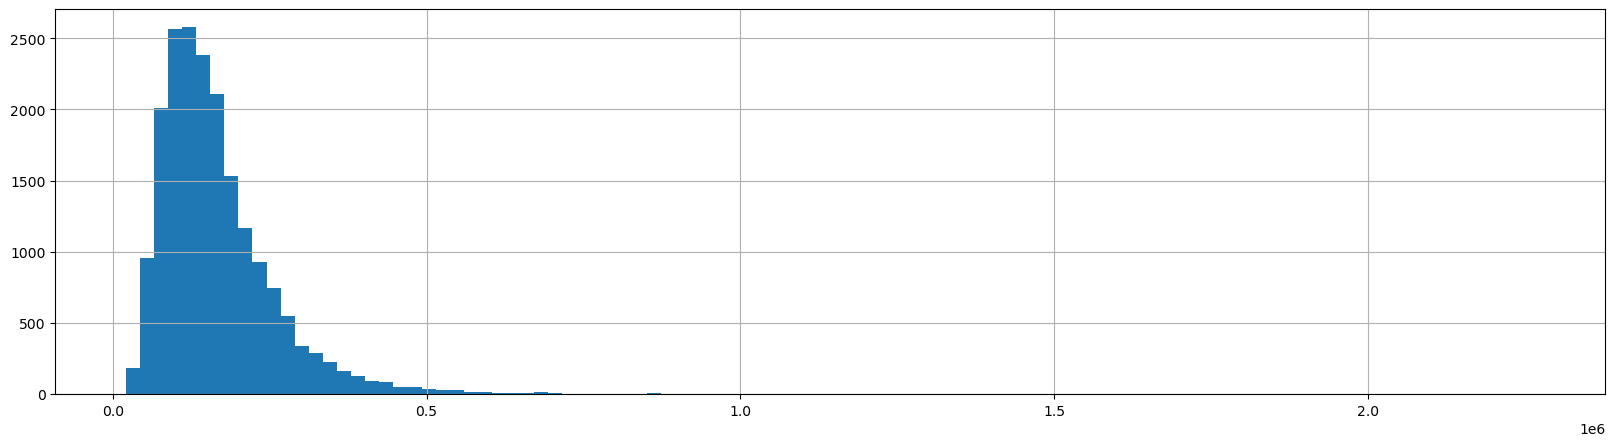

In [16]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 5))
df['total_income'].hist(bins=100, ax=ax)

## 2.4. Столбец days_employed — общий трудовой стаж в днях

In [17]:
# 2.4. days_employed — общий трудовой стаж в днях

print('                 тип: ', df['days_employed'].dtypes)
print('пропущенных значений: ', df['days_employed'].isnull().sum())

df['days_employed'].describe()

                 тип:  float64
пропущенных значений:  2174


count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

<Axes: >

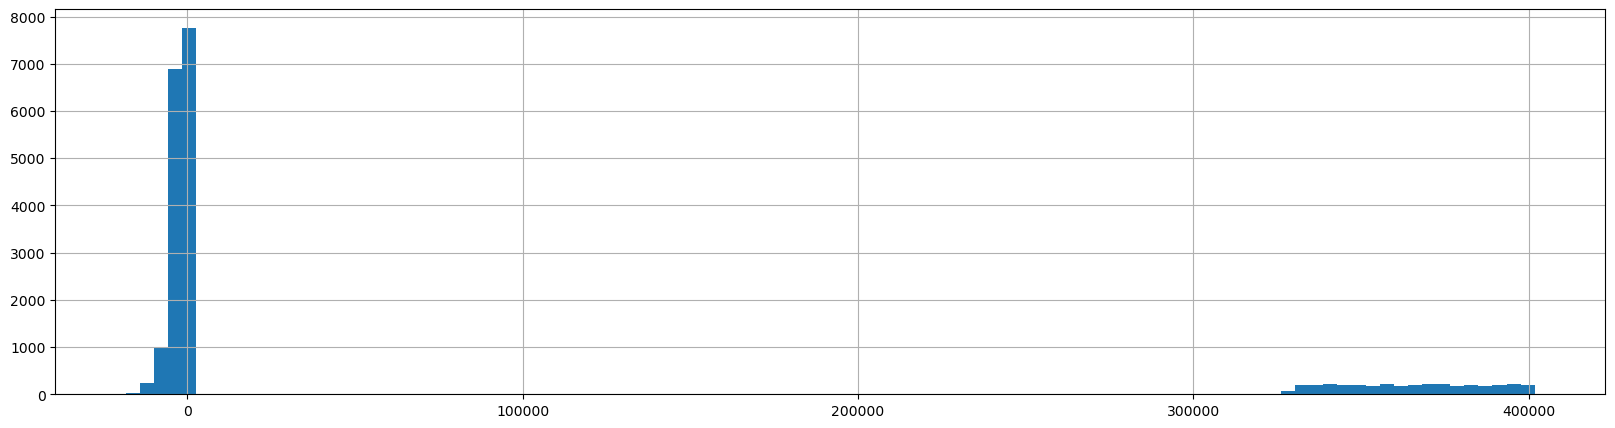

In [18]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 5))
df['days_employed'].hist(bins=100, ax=ax)

In [19]:
# переводим отрицательные значения в положительные
#df['days_employed'] = df['days_employed'].apply(lambda x: abs(x))


### Столбец `days_employed` имеет тип вещественных чисел и содержит положительные, отрицательные значения и пропуски. Всего 2174 пропущенных значения. <br> Положительные значения в этой категории слишком большие для исчисления в днях. <br> Разброс значений очень большой.

## 2.5. dob_years — возраст клиента в годах

In [20]:
# 2.5. dob_years — возраст клиента в годах

print('                 тип: ', df['dob_years'].dtypes)
print('пропущенных значений: ', df['dob_years'].isnull().sum())
print('уникальных значений:')
print(df['dob_years'].sort_values(ascending=True).unique())
print('количество нулевых (т.е. возраст = 0): ', len(df[df['dob_years']==0]))

                 тип:  int64
пропущенных значений:  0
уникальных значений:
[ 0 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75]
количество нулевых (т.е. возраст = 0):  101


### Столбец `dob_years` имеет целочисленный тип, но содержит значение 0, что противоречит здравому смыслу. Можно предположить, что 0 - значение по умолчанию при отсутствии информации в соответствующем разделе анкеты.


## 2.6. education — уровень образования клиента

In [21]:
# 2.6. education — уровень образования клиента
# education_id — идентификатор уровня образования

print('                 тип: ', df['education'].dtypes)
print('пропущенных значений: ', df['education'].isnull().sum())
print(df['education'].value_counts())

                 тип:  object
пропущенных значений:  0
среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64


### Столбец `education` содержит неявные дубликаты в виде записей, выполненных в разных регистрах возможно данные вводились вручную.
Столбец `education` — уровень образования клиента и `education_id` — идентификатор уровня образования практически дублируют друг друга.   

## 2.7. family_status — семейное положение

In [22]:
# 2.7. family_status — семейное положение
# family_status_id — идентификатор семейного положения

print('                 тип: ', df['family_status'].dtypes)
print('пропущенных значений: ', df['family_status'].isnull().sum())
print(df['family_status'].value_counts())
print (df['family_status'].unique())

                 тип:  object
пропущенных значений:  0
женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']


### Столбец `family_status` имеет значения начинающиеся с прописной буквы.
Столбец `family_status` — семейное положение и `family_status_id` — идентификатор семейного положения дублируют друг друга.    

## 2.8. gender — пол клиента

In [23]:
# 2.8. gender — пол клиента

print('                 тип: ', df['gender'].dtypes)
print('пропущенных значений: ', df['gender'].isnull().sum())
print(df['gender'].value_counts())
print(df['gender'].unique())

                 тип:  object
пропущенных значений:  0
F      14236
M       7288
XNA        1
Name: gender, dtype: int64
['F' 'M' 'XNA']


### Столбец `gender` содержит нетипичные записи 'XNA'.

## 2.9. debt — имел ли задолженность по возврату кредитов

In [24]:
# 2.9. debt — имел ли задолженность по возврату кредитов

print('                 тип: ', df['debt'].dtypes)
print('пропущенных значений: ', df['debt'].isnull().sum())
print(df['debt'].value_counts())
print(df['debt'].unique())

                 тип:  int64
пропущенных значений:  0
0    19784
1     1741
Name: debt, dtype: int64
[0 1]


### Столбец `debt` нет аномалий

## 2.10. purpose — цель получения кредита

In [25]:
# 2.10. purpose — цель получения кредита

print('                 тип: ', df['purpose'].dtypes)
print('пропущенных значений: ', df['purpose'].isnull().sum())
print(df['purpose'].value_counts())
print(df['purpose'].unique())

                 тип:  object
пропущенных значений:  0
свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомоб

### Столбец `purpose` содержит множество неявных дубликатов, записанных под разными значениями в следствие ручного ввода.

In [26]:
df2 = df.copy()
#print(len(df), len(df2))

## Step 3: Data preprocessing

In [27]:
# 3.1. children — количество детей в семье

# переводим отрицательные значения в положительные.
# ранее было принято решение записи с аномалными данными `20` и `-1` - удалить
#df2.drop(df2[(df2['children']==20)|(df2['children']==-1)].index, inplace = True)
#_ = df2.reset_index(drop=True, inplace=True)
#print(df2['children'].value_counts())
df2['children'] = df2['children'].abs()

print(len(df), len(df2))

21525 21525


In [28]:
# 3.2. income_type — тип занятости

In [29]:
# 3.3. total_income — ежемесячный доход

# заполним медианой на основании группировок двух характеристик (столбцов `children` и `income_type`) 
df2['total_income'] = df2['total_income'].fillna(df2.groupby(['income_type', 'children'])['total_income'].transform('median'))
#df2['total_income']
print('пропущенных значений: ', df2['total_income'].isnull().sum())

пропущенных значений:  0


In [30]:
# 3.4. days_employed — общий трудовой стаж в днях

print('пропущенных значений: ', df2['days_employed'].isnull().sum())

# переводим отрицательные значения в положительные
df2['days_employed'] = df2['days_employed'].apply(lambda x: abs(x))

# заполним/заменим медианой, в группировке с 2-мя характеристикам клиента
df2['days_employed'] = df2['days_employed'].fillna(df2.groupby(['income_type','children'])['days_employed'].transform('median'))

print('пропущенных значений: ', df2['days_employed'].isnull().sum())


пропущенных значений:  2174
пропущенных значений:  0


In [31]:
# меняем тип с вешественного на целочисленный тип
df2['days_employed'] = df2['days_employed'].astype('int')


In [32]:
# 3.5. dob_years — возраст клиента в годах

#print('пропущенных значений: ', df2['dob_years'].isnull().sum())
df2['dob_years'].describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [33]:
# 3.5. dob_years — возраст клиента в годах

# вариант 1.  заполним/заменим медианой, в группировке с 2-мя характеристикам клиента
df2['dob_years'] = (df2.groupby(['income_type', 'children'])['dob_years'].apply(lambda x: x.replace(0, x.median())))

# вариант 2.  удалим записи с нулевым значением в `dob_years`
#df2 = df2[df2['dob_years'] != 0]

In [34]:
df2['dob_years'].describe()

count    21525.000000
mean        43.500581
std         12.231907
min         19.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [35]:
# 3.6. education — уровень образования клиента
# education_id — идентификатор уровня образования

# приведем все значения к одному регистру
df2['education'] = df2['education'].apply(lambda x: x.lower())

#print(df2['education'].value_counts())

In [36]:
# 3.7. family_status — семейное положение
# family_status_id — идентификатор семейного положения
# приведем все значения к одному регистру

df2['family_status'] = df2['family_status'].apply(lambda x: x.lower())
#print(df2['family_status'].value_counts())

In [37]:
# 3.8. gender — пол клиента

# заменим значение 'XNA' на любое 'F' или 'M'
df2['gender'] = df2['gender'].apply(lambda x: x.replace('XNA', 'F'))

#print(df2['gender'].value_counts())

In [38]:
# 3.9. debt — имел ли задолженность по возврату кредитов


In [39]:
%%time
# 3.10. Удаление дубликатов:

print('   кол-во дублирующих записей до: ', df2.duplicated().sum())

# удаление дублирующих запмсей
df2 = df2.drop_duplicates().reset_index(drop=True)

print('кол-во дублирующих записей после: ', df2.duplicated().sum())

   кол-во дублирующих записей до:  71
кол-во дублирующих записей после:  0
CPU times: total: 46.9 ms
Wall time: 42 ms


# 3.11. purpose — цель получения кредита
Для выделения уникальных значений в столбце 'purpose' применим лематизацию

Цель: свести все значения в столбце `purpose` к однозначному единственному значению.      
для этого выполним некоторые монипуляции с текстовыми значениями столбца `purpose`- токенизация, удаление стоп слов, удаление коротких слов (менее 4 символов) лемматизация (приведение слов к одному корню) и составление словара уникальных слов.

In [40]:
#print(df2['purpose'].unique())
#list_purpose =  df2['purpose'].unique()
#print(len(list_purpose), list_purpose)
#str_purpose = ' '.join(list_purpose)
#print(type(str_purpose), len(str_purpose), str_purpose)

In [41]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('e:\\_data_set\\utils_nlp\\')
import nlp_utils
from nlp_utils.data_preparation import preprocessor
from nlp_utils.data_preparation import tokenize_corpus, build_vocabulary, texts_to_token_ids
from nlp_utils.data_preparation import lemmatize_list, lemmatize_corpus

In [42]:
# токенизируем
#str_purpose_tokenized = tokenize_corpus([str_purpose])
#print(len(str_purpose_tokenized), str_purpose_tokenized)
#str_purpose_tokenized
#purpose_lemmatize = lemmatize_corpus(str_purpose_tokenized)
#purpose_lemmatize

In [43]:
%%time

# использовать только такой вариант построения списка (Remove missing values):
dataset_v5 = list(df2['purpose'].dropna())
print(dataset_v5[ :3])

# токенизируем
train_tokenized = tokenize_corpus(dataset_v5)
print(train_tokenized[:3])

# лемматизация, такой вариант работает 3-4 минуты (Intel Core i5 11400, 12 потоков)
train_lematize_ = lemmatize_corpus(train_tokenized)
print(len(train_lematize_), train_lematize_[:3])

['покупка жилья', 'приобретение автомобиля', 'покупка жилья']
[['покупка', 'жилья'], ['приобретение', 'автомобиля'], ['покупка', 'жилья']]


lematization: 100%|██████████████████████████████████████████████████████████| 21454/21454 [00:06<00:00, 3385.51it/s]

21454 [['покупка', 'жильё'], ['приобретение', 'автомобиль'], ['покупка', 'жильё']]
CPU times: total: 6.34 s
Wall time: 6.39 s


In [44]:
%%time
# train_tokenized - список для лематизации

from tqdm import tqdm 
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
#import multiprocessing
# multiprocessing для jupyter notebook:
import multiprocess

# лемматизация
def lemmatize_list_(sentence_list):
    return [morph.parse(tok)[0].normal_form for tok in sentence_list]
    
def lemmatize_corpus_(tokens):
    #return [morph.parse(tok)[0].normal_form for tok in tokens]
    train_lematize = []
    for sentence in tokens:
        train_lematize.append(lemmatize_list_(sentence))    
    return train_lematize

# без главного модуля многопоточность не работает....
if __name__ == '__main__':    
    try:
        cpus = multiprocess.cpu_count()
    except NotImplementedError:
        cpus = 2   # arbitrary default
    print("Number of cpu : ", multiprocess.cpu_count())

    pool = multiprocess.Pool(processes=cpus)

    train_lematize = []
    """ """
    #processes=cpus
    #with multiprocessing.Pool(processes=6) as pool:
    with multiprocess.Pool(processes=cpus) as pool:
        #                                            размер фрагмента: chunksize=100.
        for result in tqdm(pool.imap(lemmatize_list, train_tokenized, chunksize=100), total=len(train_tokenized)):
            train_lematize.append(result)
            
        # shutdown the process pool
        pool.close()
        # wait for all issued task to complete
        pool.join()
            
    print(len(train_lematize))        
    print(train_lematize[0:3])
            

Number of cpu :  12


100%|███████████████████████████████████████████████████████████████████████| 21454/21454 [00:01<00:00, 10934.77it/s]


21454
[['покупка', 'жильё'], ['приобретение', 'автомобиль'], ['покупка', 'жильё']]
CPU times: total: 781 ms
Wall time: 2.4 s


In [45]:
# вариант 1
# df2['purpose_lemma'] = np.array([' '.join(lst) for lst in train_lematize])

# вариант 2
se_purpose_lemma = pd.Series([' '.join(lst) for lst in train_lematize])
df2['purpose_lemma'] = se_purpose_lemma.values

In [46]:
df2[['purpose', 'purpose_lemma']]

,purpose,purpose_lemma
0,покупка жилья,покупка жильё
1,приобретение автомобиля,приобретение автомобиль
2,покупка жилья,покупка жильё
3,дополнительное образование,дополнительный образование
4,сыграть свадьбу,сыграть свадьба
...,...,...
21449,операции с жильем,операция жильё
21450,сделка с автомобилем,сделка автомобиль
21451,недвижимость,недвижимость
21452,на покупку своего автомобиля,покупка свой автомобиль


In [47]:
%%time

# строим словарь

# подсчитать частоты токенов, частоты будем хранить в словаре со значением по умолчанию
# посчитать количество документов, в которых употребляется каждое слово
# а также общее количество документов

# убрать слишком редкие и слишком частые слова - max_doc_freq=0.9, min_count=5

# отсортировать слова по убыванию частоты 
# смотреть распределение Ципфа
#    в голове распределения содержаться: союзы, предлоги, местоимения, 
#    вопросительные слова их ценность в контексте темаьттческой классификацмм бесполезна, 
#    они встречаются во всех текстах вне зависимости от тематитки
#    в хвасте распределения: опечатки
# нумеруем слова - word2id
# нормируем частоты слов - word2freq

vocabulary, word_doc_freq = build_vocabulary(train_lematize, max_doc_freq=0.9, min_count=5, pad_word='<PAD>')
print("Размер словаря", len(vocabulary))
#print(list(vocabulary.items())[ :10])
print(vocabulary)
#print(word_doc_freq)

Размер словаря 26
{'<PAD>': 0, 'недвижимость': 1, 'покупка': 2, 'жильё': 3, 'автомобиль': 4, 'образование': 5, 'операция': 6, 'свадьба': 7, 'свой': 8, 'строительство': 9, 'высокий': 10, 'получение': 11, 'коммерческий': 12, 'жилой': 13, 'подержать': 14, 'сделка': 15, 'дополнительный': 16, 'заняться': 17, 'проведение': 18, 'сыграть': 19, 'сдача': 20, 'семья': 21, 'собственный': 22, 'ремонт': 23, 'приобретение': 24, 'профильный': 25}
CPU times: total: 15.6 ms
Wall time: 10 ms


# из словаря сформируем категории:
* недвижимость / жильё
* автомобиль
* образование
* свадьба
* семья
* ремонт
* прочее


In [48]:
#list_category = ['недвижимость', 'автомобиль', 'образование', 'свадьба', 'семья', 'ремонт', 'прочее']

In [129]:
def purpose_set_category(purpose_lemma):
    if   ('недвижимость' in purpose_lemma): return 'коммерческая недвижимость'
    elif ('жильё' in purpose_lemma): return 'жилье'
    elif ('автомобиль' in purpose_lemma): return 'автомобиль'
    elif ('образование' in purpose_lemma): return 'образование'
    elif ('свадьба' in purpose_lemma): return 'свадьба'
    elif ('семья' in purpose_lemma): return 'семья'
    elif ('ремонт' in purpose_lemma): return 'ремонт'
    else:  return 'прочее'


In [130]:
from tqdm import tqdm
tqdm.pandas()

df2['purpose_category'] = df2['purpose_lemma'].progress_apply(purpose_set_category)

100%|█████████████████████████████████████████████████████████████████████| 21454/21454 [00:00<00:00, 1192417.55it/s]


In [131]:
df2[['purpose_lemma', 'purpose_category']]

,purpose_lemma,purpose_category
0,покупка жильё,жилье
1,приобретение автомобиль,автомобиль
2,покупка жильё,жилье
3,дополнительный образование,образование
4,сыграть свадьба,свадьба
...,...,...
21449,операция жильё,жилье
21450,сделка автомобиль,автомобиль
21451,недвижимость,коммерческая недвижимость
21452,покупка свой автомобиль,автомобиль


In [133]:
df2['purpose_category'].value_counts()

#print(df['income_type'].value_counts())
#print (df['income_type'].unique())
#pokemon_games = df2.loc[df2['purpose_lemma'].str.contains('здоровье', case=False)]
#print(pokemon_games)
#pokemon_games = df2.loc[df2['purpose_lemma'].str.contains('медицинск', case=False)]
#print(pokemon_games)

коммерческая недвижимость    6351
жилье                        4460
автомобиль                   4306
образование                  4013
свадьба                      2324
Name: purpose_category, dtype: int64

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  int32  
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  purpose_lemma     21454 non-null  object 
 13  purpose_category  21454 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(7)
memory usage: 2.2+ MB


In [54]:
#df2[['education', 'education_id']]
#df2[['family_status', 'family_status_id']]

dict_education = df2[['education', 'education_id']]
dict_education = dict_education.drop_duplicates().reset_index(drop=True)

dict_family_status = df2[['family_status', 'family_status_id']]
dict_family_status = dict_family_status.drop_duplicates().reset_index(drop=True)

In [55]:
dict_education

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [56]:
dict_family_status

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,не женат / не замужем,4


In [57]:
df3 = df2[['children', 'days_employed', 'education_id', 'family_status_id',
           'gender', 'income_type', 'debt', 'total_income', 'purpose']]
df3.head()

,children,days_employed,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,0,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024,1,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623,1,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124,1,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266,1,1,F,пенсионер,0,158616.077870,сыграть свадьбу


# Шаг 4. Ответьте на эти вопросы: <br> Step 3. Answer these questions:

* Есть ли связь между рождением детей и своевременным погашением кредита? <br> Is there a connection between having kids and repaying a loan on time?
* Есть ли связь между семейным положением и своевременным погашением кредита? <br> Is there a connection between marital status and repaying a loan on time?
* Есть ли связь между уровнем дохода и своевременным погашением кредита? <br> Is there a connection between income level and repaying a loan on time?
* Как различные цели кредитования влияют на своевременное погашение кредита? <br> How do different loan purposes affect timely loan repayment?

## 4.1. Есть ли связь между рождением детей и своевременным погашением кредита? <br> Is there a connection between having kids and repaying a loan on time?

In [59]:
df2.groupby('children').agg({'debt':['count', 'sum', ('% имеющих долг', lambda x: x.mean()*100),
                                                     ('% не имеющих долг', lambda x: 100 - x.mean()*100)]})

debt                                       
          count   sum % имеющих долг % не имеющих долг
children                                              
0         14091  1063       7.543822         92.456178
1          4855   445       9.165808         90.834192
2          2052   194       9.454191         90.545809
3           330    27       8.181818         91.818182
4            41     4       9.756098         90.243902
5             9     0       0.000000        100.000000
20           76     8      10.526316         89.473684

In [76]:
df2['there_are_no_children'] = [0 if (df2.loc[ei, 'children'] == 0) else 1 
                                for ei in df2.index]

#df2[['children', 'there_are_no_children']]

In [80]:
df2_group = df2.groupby('there_are_no_children').agg(
                        {'debt':['count', 'sum', ('% имеющих долг', lambda x: x.mean()*100),
                                                 ('% не имеющих долг', lambda x: 100 - x.mean()*100)]
                        })

df2_group.info()
df2_group.columns
df2_group

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (debt, count)              2 non-null      int64  
 1   (debt, sum)                2 non-null      int64  
 2   (debt, % имеющих долг)     2 non-null      float64
 3   (debt, % не имеющих долг)  2 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 80.0 bytes


debt                                       
                       count   sum % имеющих долг % не имеющих долг
there_are_no_children                                              
0                      14091  1063       7.543822         92.456178
1                       7363   678       9.208203         90.791797

In [88]:
delta = df2_group['debt', '% не имеющих долг'][0] - df2_group['debt', '% не имеющих долг'][1]

print('{:.3}%'.format(delta))

1.66%


Количество людей у ктоторых имеется долг по кредитам в разы меньше чем количество людей у кототрых нет долга по кредитам, и это не зависит от наличия и количество людей.   

Доля людей у которых нет детей и нет задолженности по кредитам - 92.456178 %   
доля людей у которых есть дети и нет задолженности по кредитам - 90.791797 %   
разница между двумя этими группами - 1.66 %     

### т.е. наличие детей на своевременное погашение не влияет (задолженность по кредитам не влияет). 

### из таблицы видно, что количество детей никак не влияет на задолженность по кредиту.   так как количество заемщиков у которых есть дети и не имеющих долги намного больше чем заемщиков имеющих детей но с долгами

## 4.2. Есть ли связь между семейным положением и своевременным погашением кредита? <br> Is there a connection between marital status and repaying a loan on time?

In [89]:
dict_family_status

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,не женат / не замужем,4


In [98]:
df2['family_or_not'] = [0 if ((df2.loc[ei, 'family_status_id'] == 0) or 
                              (df2.loc[ei, 'family_status_id'] == 1)) else 1 
                                      for ei in df2.index]

#df2[['family_status', 'family_status_id', 'family_or_not']]

,family_status,family_status_id,family_or_not
0,женат / замужем,0,0
1,женат / замужем,0,0
2,женат / замужем,0,0
3,женат / замужем,0,0
4,гражданский брак,1,0
...,...,...,...
21449,гражданский брак,1,0
21450,женат / замужем,0,0
21451,гражданский брак,1,0
21452,женат / замужем,0,0


In [99]:
#df2_pivot = df2.pivot_table(index='family_status_id', values='debt', aggfunc=['sum', 'count'])
df2_pivot_2 = df2.pivot_table(index='family_or_not', values='debt', aggfunc=['sum', 'count'])

df2_pivot_2

,sum,count
,debt,debt
family_or_not,,
0,1319,16490
1,422,4964


In [100]:
df2_group = df2.groupby('family_or_not').agg(
                        {'debt':['count', 'sum', ('% имеющих долг', lambda x: x.mean()*100),
                                                 ('% не имеющих долг', lambda x: 100 - x.mean()*100)]
                        })

df2_group.info()
df2_group.columns
df2_group

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (debt, count)              2 non-null      int64  
 1   (debt, sum)                2 non-null      int64  
 2   (debt, % имеющих долг)     2 non-null      float64
 3   (debt, % не имеющих долг)  2 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 80.0 bytes


debt                                       
               count   sum % имеющих долг % не имеющих долг
family_or_not                                              
0              16490  1319       7.998787         92.001213
1               4964   422       8.501209         91.498791

Доля (количество) женатых которые не имеют долги по кредитам больше (92.001213 %), чем те которые одинокие (91.498791 %)
Доля (количество) женатых которые имеют долги по кредитам меньше (7.998787 %), чем те которые одинокие (8.501209 %)

### т.е. статус заемщика обремененного семейным положением влияет на своевременное погашение кредита.

## 4.3. Есть ли связь между уровнем дохода и своевременным погашением кредита? <br> Is there a connection between income level and repaying a loan on time?

In [103]:
#На основании диапазонов, указанных ниже, создайте столбец total_income_category с категориями:
#0–30000 — 'E';
#30001–50000 — 'D';
#50001–200000 — 'C';
#200001–1000000 — 'B';
#1000001 и выше — 'A'.

def category_total_income(total_income):
    try:
        if (total_income > 0) and (total_income <= 30000):        return 'от 0 до 30000'
        if (total_income > 30000) and (total_income <= 50000):    return 'от 30001 до 50000'
        if (total_income > 50000) and (total_income <= 200000):   return 'от 50001 до 200000'
        if (total_income > 200000) and (total_income <= 1000000): return 'от 200001 до 1000000'
        if (total_income > 1000000):                              return 'от 1000001 и выше'
        else: return 'Данные по доходам не могут быть меньше или раны нулю'
    except:
        return 'Данные по доходам неверные или отсутствуют'

from tqdm import tqdm
tqdm.pandas()

df2['category_total_income'] = df2['total_income'].progress_apply(category_total_income)

df2['category_total_income'].value_counts()

100%|█████████████████████████████████████████████████████████████████████| 21454/21454 [00:00<00:00, 1191864.77it/s]


от 50001 до 200000      16013
от 200001 до 1000000     5044
от 30001 до 50000         350
от 1000001 и выше          25
от 0 до 30000              22
Name: category_total_income, dtype: int64

In [104]:
df2_group = df2.groupby('category_total_income').agg(
                        {'debt':['count', 'sum', ('% имеющих долг', lambda x: x.mean()*100),
                                                 ('% не имеющих долг', lambda x: 100 - x.mean()*100)]
                        })

df2_group.info()
df2_group.columns
df2_group

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, от 0 до 30000 to от 50001 до 200000
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (debt, count)              5 non-null      int64  
 1   (debt, sum)                5 non-null      int64  
 2   (debt, % имеющих долг)     5 non-null      float64
 3   (debt, % не имеющих долг)  5 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 200.0+ bytes


debt                                       
                       count   sum % имеющих долг % не имеющих долг
category_total_income                                              
от 0 до 30000             22     2       9.090909         90.909091
от 1000001 и выше         25     2       8.000000         92.000000
от 200001 до 1000000    5044   356       7.057891         92.942109
от 30001 до 50000        350    21       6.000000         94.000000
от 50001 до 200000     16013  1360       8.493099         91.506901

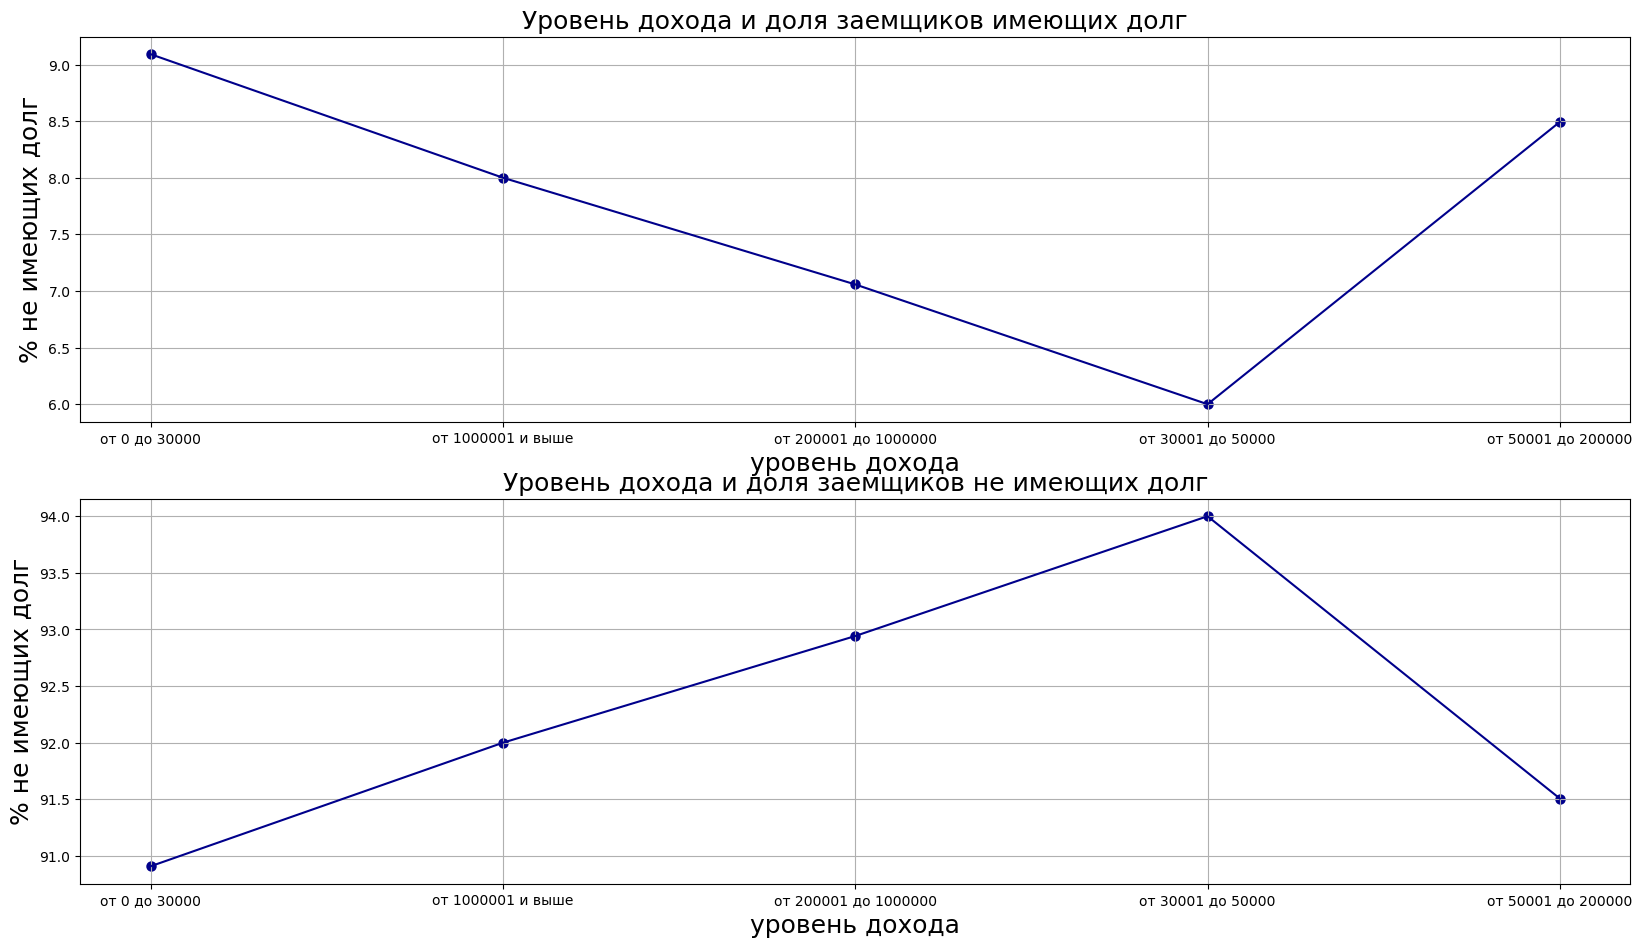

In [126]:
_, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(20, 11))

ax1.scatter(df2_group.index, df2_group['debt', '% имеющих долг'], color='DarkBlue', linewidth=1.5)
ax1.plot(df2_group['debt', '% имеющих долг'], color='DarkBlue', linewidth=1.5)
ax1.set_title('Уровень дохода и доля заемщиков имеющих долг', fontsize=18)
ax1.set_xlabel('уровень дохода', fontsize=18)
ax1.set_ylabel('% не имеющих долг', fontsize=18)
ax1.grid(True)

ax2.scatter(df2_group.index, df2_group['debt', '% не имеющих долг'], color='DarkBlue', linewidth=1.5)
ax2.plot(df2_group['debt', '% не имеющих долг'], color='DarkBlue', linewidth=1.5)
ax2.set_title('Уровень дохода и доля заемщиков не имеющих долг', fontsize=18)
ax2.set_xlabel('уровень дохода', fontsize=18)
ax2.set_ylabel('% не имеющих долг', fontsize=18)
ax2.grid(True)

### На графике наглядно видно, что с ростом дохода повышается своевременность погашения долга (но до уровня дохода от 300001 до 500000), а далее почему то резко снижается.

## 4.4. Как различные цели кредитования влияют на своевременное погашение кредита? <br> How do different loan purposes affect timely loan repayment?

In [128]:
df2_group = df2.groupby('purpose_category').agg(
                        {'debt':['count', 'sum', ('% имеющих долг', lambda x: x.mean()*100),
                                                 ('% не имеющих долг', lambda x: 100 - x.mean()*100)]
                        })

df2_group.info()
df2_group.columns
df2_group

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, автомобиль to свадьба
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (debt, count)              4 non-null      int64  
 1   (debt, sum)                4 non-null      int64  
 2   (debt, % имеющих долг)     4 non-null      float64
 3   (debt, % не имеющих долг)  4 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 160.0+ bytes


debt                                      
                  count  sum % имеющих долг % не имеющих долг
purpose_category                                             
автомобиль         4306  403       9.359034         90.640966
недвижимость      10811  782       7.233373         92.766627
образование        4013  370       9.220035         90.779965
свадьба            2324  186       8.003442         91.996558

In [ ]:
df3 = df2[['children', 'days_employed', 'education_id', 'family_status_id',
           'gender', 'income_type', 'debt', 'total_income', 'purpose']]
df3.head()



## Шаг 3. Ответьте на эти вопросы:
— Есть ли связь между рождением детей и своевременным погашением кредита?
— Есть ли связь между семейным положением и своевременным погашением кредита?
— Есть ли связь между уровнем дохода и своевременным погашением кредита?
— Как различные цели кредитования влияют на своевременное погашение кредита?
Интерпретируйте свои ответы. Объясните, что означают полученные вами результаты.

## Step 4. Write an overall conclusion.

roject
Step 1. Open the data file /datasets/credit_scoring_eng.csv and have a look at the general information.
Step 2. Preprocess the data:
—Identify and fill in missing values.
—Replace the real number data type with the integer type.
—Delete duplicate data.
—Categorize the data.
Explain:
—which missing values you identified;
—possible reasons these missing values were present;
—which method you used to fill in missing values;
—which method you used to find and delete duplicate data and why;
—possible reasons why duplicate data was present;
—which method you used to change the data type and why;
—which dictionaries you've selected for this data set and why.
The data may contain artifacts, or values that don't correspond to reality—for instance, a negative number of days
employed. This kind of thing happens when you're working with real data. You need to describe the possible reasons
such data may have tu
rned up and process it.
Step 3. Answer these questions:
—Is there a connection between having kids and repaying a loan on time?
—Is there a connection between marital status and repaying a loan on time?
—Is there a connection between income level and repaying a loan on time?
—How do different loan purposes affect timely loan repayment?
Interpret your answers. Explain what t
he results you obtained mean.
Step 4. Write an overall conclusion.
Format: Complete the project in the Jupyter Notebook (it opens when you click Next). Write code in the code cells
and notes with explanations and interpretations in the markdown cells. Use formatting and headings.
Data description
—children : the number of children in the family
—days_employed: how long the customer has worked
—dob_years: the customer’s age
—education: the customer’s education level
—education_id: identifier for the customer’s education
—family_status: the customer’s marital status
—family_status_id: identifier for the customer’s marital status
—gender: the customer’s gender
—income_type: the customer’s income type
—debt: whether the client has ever defaulted on a loan
—total_income: annual income
—purpose: reason for taking out a loan

In [44]:
%qtconsole

In [45]:
https://coderlessons.com/tutorials/python-technologies/jupyter/jupyter-qtconsole-vstroennaia-grafika

SyntaxError: invalid syntax (4175586793.py, line 1)

In [ ]:
https://habr.com/ru/articles/485318/
    

In [ ]:
from __future__ import print_function

print('hi, stderr', file=sys.stderr)
hi, stderr